In [11]:
import fiftyone as fo
import fiftyone.zoo as foz

import fiftyone.utils.huggingface as fouh

dataset = fouh.load_from_hub(
    "Voxel51/GQA-Scene-Graph",
    max_samples=200,
    overwrite=True
    )

Loading dataset
Importing samples...
 100% |█████████████████| 200/200 [14.3ms elapsed, 0s remaining, 14.0K samples/s]      
Migrating dataset 'Voxel51/GQA-Scene-Graph' to v1.7.0


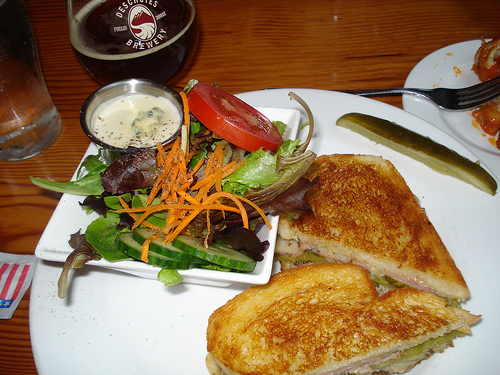

In [13]:
from PIL import Image

Image.open(dataset.first().filepath)

In [14]:
import fiftyone.zoo as foz

# Register the model source
foz.register_zoo_model_source(
    "https://github.com/harpreetsahota204/Nemotron_Nano_VL", 
    overwrite=True
    )

  129.1Kb [45.5ms elapsed, ? remaining, 2.8Mb/s] 
Overwriting existing model source '/home/harpreet/fiftyone/__models__/Llama-3.1-Nemotron-Nano-VL-8B-V1'


In [15]:
import fiftyone.zoo as foz
model = foz.load_zoo_model(
    "nvidia/Llama-3.1-Nemotron-Nano-VL-8B-V1",
    # install_requirements=True, #you can pass this to make sure you have all reqs installed
    )

# Visual Question Answering

In [16]:
model.operation = "vqa"
model.prompt = "Describe this image"
dataset.apply_model(model, label_field="vqa_results")

 100% |█████████████████| 200/200 [14.3m elapsed, 0s remaining, 0.2 samples/s]    


In [17]:
print(dataset.first()['vqa_results'])

The image captures a delightful meal set on a wooden table. At the center of the frame is a white plate holding a sandwich, cut into two triangular halves, revealing layers of meat and cheese. The sandwich is accompanied by a side salad, a mix of fresh greens, orange carrot shreds, and a slice of tomato, all lightly dressed. A small bowl of dressing is also present on the plate.

To the side of the plate, there's a pickle spear, adding a touch of green to the scene. A glass of dark beer sits nearby, its frothy top suggesting it's freshly poured. The beer glass has a logo that reads "Deschutes Brewery," indicating the brand.

The arrangement of the food and drink items suggests a casual dining experience, with each element thoughtfully placed to create an inviting and appetizing tableau.


In [24]:
model.operation = "vqa"
model.prompt = "Provide a short caption for this image"
dataset.apply_model(model, label_field="short_caption")

 100% |█████████████████| 200/200 [6.8m elapsed, 0s remaining, 0.6 samples/s]    


In [25]:
print(dataset.first()['short_caption'])

A short caption for this image could be: "A hearty meal of a grilled sandwich and fresh salad with a side of pickles, accompanied by a glass of dark beer, all set on a wooden table."


# Detection

The below example will use the captions generated above for grounded detection

In [18]:
model.operation = "detect"

dataset.apply_model(
    model, 
    prompt_field="vqa_results", 
    label_field="nemo_detections"
    )

 100% |█████████████████| 200/200 [17.7m elapsed, 0s remaining, 0.2 samples/s]    


In [19]:
dataset.first()['nemo_detections']

<Detections: {
    'detections': [
        <Detection: {
            'id': '6866d0e5d4ca8634a714f325',
            'attributes': {},
            'tags': [],
            'label': 'Sandwich',
            'bounding_box': [0.4, 0.65, 0.56, 0.21],
            'mask': None,
            'mask_path': None,
            'confidence': None,
            'index': None,
            'reasoning': 'The main dish, cut into two halves.',
        }>,
        <Detection: {
            'id': '6866d0e5d4ca8634a714f326',
            'attributes': {},
            'tags': [],
            'label': 'Salad',
            'bounding_box': [0.09, 0.21, 0.54, 0.51],
            'mask': None,
            'mask_path': None,
            'confidence': None,
            'index': None,
            'reasoning': 'A side dish with greens, carrots, and tomato.',
        }>,
        <Detection: {
            'id': '6866d0e5d4ca8634a714f327',
            'attributes': {},
            'tags': [],
            'label': 'Dressing',
  

You can also pass a single prompt that can be used for all samples:

In [20]:
detection_prompt = """Detect the objects in this image and their spatial relationship to the other objects next to it.

Always return your response as valid JSON wrapped in ```json blocks.

```json
{
    "detections": [
        {
            "answer": , # the object you see
            "reason": , # the spatial relationship between this object and the objects near it. State the exact relationship and the object name
            "bbox": (x1, y1, x2, y2), # 'bbox' refers to the bounding box position of the 'answer' content in the image. bbox is the coordinates of the top-left corner and the bottom-right corners. The 'bbox' should be normalized coordinates ranging from O to 1000 by the image width and height.
            
        },
    ]
}


"""

In [21]:
model.prompt = detection_prompt

dataset.apply_model(
    model, 
    label_field="spatial_detections"
    )

 100% |█████████████████| 200/200 [20.3m elapsed, 0s remaining, 0.2 samples/s]    


In [22]:
dataset.first()['spatial_detections']

<Detections: {
    'detections': [
        <Detection: {
            'id': '6866d50cd4ca8634a714f65a',
            'attributes': {},
            'tags': [],
            'label': 'Salad',
            'bounding_box': [0.1, 0.28, 0.53, 0.44],
            'mask': None,
            'mask_path': None,
            'confidence': None,
            'index': None,
            'reasoning': 'Located to the left of the sandwich, served in a square bowl.',
        }>,
        <Detection: {
            'id': '6866d50cd4ca8634a714f65b',
            'attributes': {},
            'tags': [],
            'label': 'Sandwich',
            'bounding_box': [0.41, 0.41, 0.55, 0.45],
            'mask': None,
            'mask_path': None,
            'confidence': None,
            'index': None,
            'reasoning': 'Main dish, placed to the right of the salad.',
        }>,
        <Detection: {
            'id': '6866d50cd4ca8634a714f65c',
            'attributes': {},
            'tags': [],
          

# Classification

In [23]:
model.operation = "classify"

model.prompt = "Classify this image into all applicable classes: indoor scene, outdoor scene, mostly animals, mostly humans"

dataset.apply_model(
    model, 
    label_field="nemo_classes"
    )

 100% |█████████████████| 200/200 [11.0m elapsed, 0s remaining, 0.3 samples/s]    


In [26]:
dataset.first()['nemo_classes']

<Classifications: {
    'classifications': [
        <Classification: {
            'id': '6866d9cbd4ca8634a714f99c',
            'tags': [],
            'label': 'indoor scene',
            'confidence': None,
            'logits': None,
            'reasoning': 'The setting is inside a building, indicated by the wooden table and the style of the glassware, which are typical of an indoor dining environment.',
        }>,
        <Classification: {
            'id': '6866d9cbd4ca8634a714f99d',
            'tags': [],
            'label': 'mostly food',
            'confidence': None,
            'logits': None,
            'reasoning': 'The image predominantly features food items, such as a salad, sandwich, and pickles, which are the main subjects of the photograph.',
        }>,
        <Classification: {
            'id': '6866d9cbd4ca8634a714f99e',
            'tags': [],
            'label': 'dining setting',
            'confidence': None,
            'logits': None,
            '


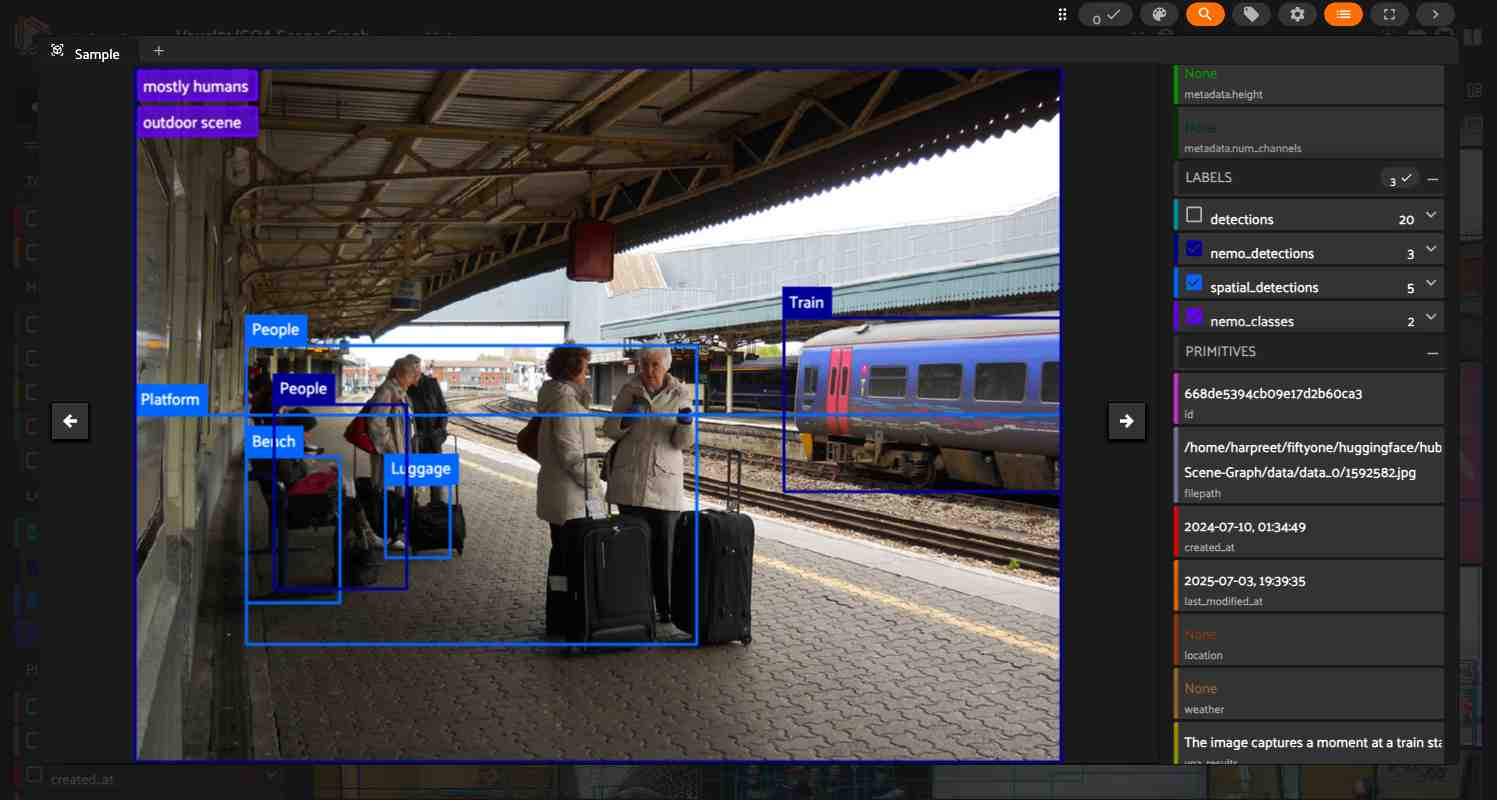

In [27]:
session = fo.launch_app(dataset)

In [28]:
session.freeze()